In [1]:
import sys
sys.path.append('../')

In [2]:
from mrl.imports import *
from mrl.core import *
from mrl.chem import *
from mrl.templates import *

/home/dmai/miniconda3/envs/mrl/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.
  return f(*args, **kwds)


In [3]:
from mrl.torch_imports import *
from mrl.torch_core import *
from mrl.layers import *
from mrl.dataloaders import *
from mrl.g_models import *
from mrl.agent import *
from mrl.vocab import *
from mrl.callbacks import *
from mrl.callbacks.template_cb import *
from mrl.agent import *
from mrl.policy_gradient import *
from mrl.loss import *
from mrl.sampler import *
from mrl.environment import *
from mrl.reward import *

In [4]:
os.environ['ncpus'] = '0'
torch.cuda.set_device(1)

In [5]:
df = pd.read_csv('../nbs/untracked_files/affinity_data.csv')

In [11]:
df[df.value<-2].smiles.values

array(['Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1',
       'Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1',
       'C=CC(=O)Nc1ccc2ncnc(Nc3cc(F)c(Cl)c(Cl)c3)c2c1',
       'CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC',
       'CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCC1C2COCC21',
       'COc1c(O)cc(O)c2c(=O)c(-c3ccc(O)cc3)coc12',
       'COc1cc2ncnc(Nc3ccc(Br)c(Br)c3)c2cc1OC',
       'Cn1cnc2cc3c(Nc4cccc(Br)c4)ncnc3cc21',
       'Cn1cnc2cc3ncnc(Nc4cccc(Br)c4)c3cc21',
       'Nc1ccc2c(Nc3cccc(Br)c3)ncnc2c1', 'Nc1ccc2cncnc2c1',
       'O=C(CCCCCCn1cc(-c2ccc3ncnc(Nc4cccc(Cl)c4F)c3c2)nn1)NO',
       'O=C(O)c1cc(N(Cc2cc(O)ccc2O)Cc2cc(O)ccc2O)ccc1O'], dtype=object)

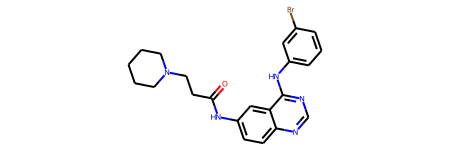

In [13]:
to_mol('O=C(CCN1CCCCC1)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1')

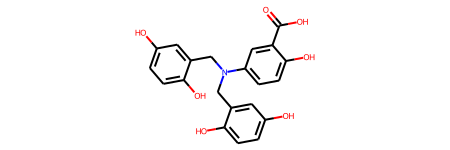

In [14]:
to_mol('O=C(O)c1cc(N(Cc2cc(O)ccc2O)Cc2cc(O)ccc2O)ccc1O')

In [18]:
df[df.value<-1].smiles.map(lambda x: rot_chain_length(to_mol(x)))

45       2
61       2
62       2
161      6
323      3
857      3
950      3
1096     3
1101     3
1280     3
1286     3
1296     3
1912     3
2264     5
2266     5
2324     2
2447     3
2617     3
2670     5
2764     2
3025     1
3341     3
3356     6
3359     7
3406     7
3654     2
3681     3
3706     8
3785    11
4397     4
4398     4
4801     2
4998     4
5035     4
5043     4
5045     2
5046     2
5053     4
5280     3
5499     2
5523     2
5526     2
5528     2
5533     0
5845     8
5850     7
5855     5
5919     4
6094     5
6095     5
6104     3
6118     5
6125     5
6282     2
6370     4
6396     3
6397     3
6398     3
6452     2
Name: smiles, dtype: int64

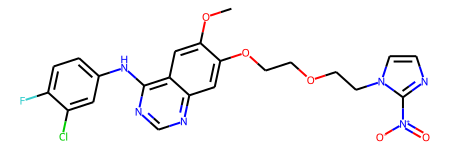

In [26]:
to_mol(df.iloc[3359].smiles)

In [27]:
df.iloc[3359].smiles

'COc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCOCCn1ccnc1[N+](=O)[O-]'

In [5]:
df = pd.read_csv('/home/dmai/smiles_datasets/frags.csv')

In [6]:
df.head()

,smiles,attachments,weight,atoms
0,*COC(=O)C(C)(CCCOCC(*)COC(C)=O)C(=O)O*,3,287.113078,20
1,*N(C(=O)c1ccc(I)cc1OC)C(C)C(=O)OCC,1,376.004581,19
2,*CCOCCn1c(C2CC2)nnc1N1CC(C)OC2(CCOC2*)C1,2,334.200491,24
3,*CC(*)Oc1c(F)cc(CN(*)C)cc1O*,4,195.069557,14
4,*OC(=O)c1ccc(NC(=O)CN(*)c2nc3c(*)cccc3s2)cc1,3,324.044287,23


In [7]:
df.shape

(182333193, 4)

In [8]:
linkers = df[df.attachments==2]

In [9]:
linkers.shape

(52476775, 4)

In [10]:
linkers

,smiles,attachments,weight,atoms
2,*CCOCCn1c(C2CC2)nnc1N1CC(C)OC2(CCOC2*)C1,2,334.200491,24
9,*C(*)=CC(=O)N1CCC(Nc2nc(C)ccc2C#N)C1C,2,268.132411,20
14,*c1ccc(OC(F)F)c(CNc2ccc(OC(*)(F)F)c(C#N)c2)c1,2,338.067840,24
16,*CN(CCNC(=O)Cc1ccsc1C)CCO*,2,254.108899,17
17,*Oc1cc(O)ncc1C(=O)NCC(*)O,2,196.048407,14
...,...,...,...,...
182333181,*c1cc2ncnc(Nc3ccc4nn(*)cc4c3)c2cc1OC,2,289.096360,22
182333183,*c1c(O)cc2occ(*)c(=O)c2c1C(=O)O,2,204.005873,15
182333188,*SCc1ccc(C(=O)NCCCOC(*)C)cc1,2,251.098000,17
182333191,*COC(=O)NC(Cc1ccccc1)C(*)CN(Cc1ccccc1)S(=O)(=O...,2,450.161328,32


In [11]:
set_global_pool(cpus=64)

In [12]:
linkers['rings'] = linkers.smiles.map(lambda x: x.count('1')>1)

/home/dmai/miniconda3/envs/mrl/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
linkers

,smiles,attachments,weight,atoms,rings
2,*CCOCCn1c(C2CC2)nnc1N1CC(C)OC2(CCOC2*)C1,2,334.200491,24,True
9,*C(*)=CC(=O)N1CCC(Nc2nc(C)ccc2C#N)C1C,2,268.132411,20,True
14,*c1ccc(OC(F)F)c(CNc2ccc(OC(*)(F)F)c(C#N)c2)c1,2,338.067840,24,True
16,*CN(CCNC(=O)Cc1ccsc1C)CCO*,2,254.108899,17,True
17,*Oc1cc(O)ncc1C(=O)NCC(*)O,2,196.048407,14,True
...,...,...,...,...,...
182333181,*c1cc2ncnc(Nc3ccc4nn(*)cc4c3)c2cc1OC,2,289.096360,22,True
182333183,*c1c(O)cc2occ(*)c(=O)c2c1C(=O)O,2,204.005873,15,True
182333188,*SCc1ccc(C(=O)NCCCOC(*)C)cc1,2,251.098000,17,True
182333191,*COC(=O)NC(Cc1ccccc1)C(*)CN(Cc1ccccc1)S(=O)(=O...,2,450.161328,32,True


In [14]:
gc.collect()

0

In [18]:
linkers = linkers[~linkers.rings]

In [19]:
linkers.shape

(1167776, 5)

In [22]:
linkers = linkers[['smiles', 'weight', 'atoms']]

In [23]:
linkers.shape

(1167776, 3)

In [24]:
linkers.to_csv('/home/dmai/smiles_datasets/linkers.csv', index=False)

<AxesSubplot:>

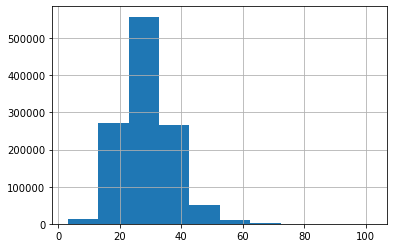

In [28]:
linkers.smiles.map(lambda x: len(x)).hist()

In [ ]:
class PoolingHead(nn.Module):
    def __init__(self, d_in, dims, d_out, drops, outrange=None):
        super().__init__()
        
        self.layers = MLP_Encoder(d_in, dims, d_out, drops)
        self.outrange = outrange
        
    def forward(self, x, mask=None):
        # x - bs, sl, d
        # mask - bs, sl
        if mask is not None:
            lengths = mask.sum(-1)
            final_vals = x[torch.arange(x.shape[0]), lengths-1]
            pool1 = x.masked_fill(mask.unsqueeze(-1), 0).sum(1)/lengths.unsqueeze(-1)
            pool2 = x.masked_fill(mask.unsqueeze(-1), -float('inf')).max(1)[0]
        else:
            final_vals = x[:,-1]
            pool1 = x.mean(1)
            pool2 = x.max(1)[0]
            
        x = torch.cat([final_vals, pool1, pool2], 1)
        x = self.layers(x)
        
        if self.outrange is not None:
            x = torch.sigmoid(x) * (self.outrange[1]-self.outrange[0]) + self.outrange[0]
        
        return x
    
class Predictive_LSTM(nn.Module):
    def __init__(self, d_vocab, d_embedding, d_hidden, n_layers, d_out_lstm,
                 head_dims, head_drops, d_out, outrange=None,
                 lstm_drop=0., bidir=False,):
        super().__init__()
        
        self.embedding = nn.Embedding(d_vocab, d_embedding)
        self.lstm = LSTM(d_embedding, d_hidden, d_out_lstm, n_layers,
                                     bidir=bidir, dropout=lstm_drop)
        
        self.head = PoolingHead(d_out_lstm*3, head_dims, d_out, head_drops, outrange)

        
    def forward(self, x, hiddens=None, mask=None):
        
        x = self.embedding(x)
        encoded, hiddens = self.lstm(x, hiddens)
        output = self.head(encoded, mask)
        return output
    
    def freeze_encoder(self):
        for p in self.embedding.parameters():
            p.requires_grad_(False)
            
        for p in self.lstm.parameters():
            p.requires_grad_(False)
    
    def load_from_lm(self, lm_model):
        if hasattr(lm_model, 'block'):
            self.embedding.load_state_dict(lm_model.block.embedding.state_dict())
            self.lstm.load_state_dict(lm_model.block.lstm.state_dict())
        else:
            if hasattr(lm_model, 'lstm'):
                self.lstm.load_state_dict(lm_model.lstm.state_dict())
                
            if hasattr(lm_model, 'embedding'):
                self.embedding.load_state_dict(lm_model.embedding.state_dict())



current roadmap
    python 3.7 upgrade?
    Do PR
    move template lookup out of parallel processing
    now we do documentation/update site
    test flags for cuda, rdkit
    combichem
    jtnnvae
    model zoo/dataset zoo
    start working on other docs
        guides
        examples
    move to release v0
    

active learning sampler
    input reward function
    recompute every x iterations
    
    

future modules
    combichem
    pharmacophore
    active learning
    new models
        jtnnvae
        flow based
    chemprop hooks
    huggingface hooks
    basic docking
        
project quality
    collab links
    google search on site
    more documentation

Use cases/examples
    basic drug design
    iterative drug design with dataset building
    drug design with docking proxy
    proteins/antibodies
    polymers
    catalyst
    materials
    
guides
    generative screening primer
    basics
        stuff about how bad score functions can be
    how to use callbacks
    basic drug design
    contrastive optimization
    latent/prior optimization
    training tips/tricks (callback stuff)
    
paapers to implement
    fastai guy - conditional lstm, contrastive
    moldqn - dqn sampler (rollout), agent is score function, dqn loss
    synthesis constrained? really same as DQN with different rolllout
    stoned selfies/genetic algorithm examples
    deep drug decoder/paul paper/other conditional generation
    
    
other research
    masif protein thing for ligands
    conformer point clouds